In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [2]:
RF_result = pd.read_excel(r"/opt/jupyter_data/model/RF_score.xlsx")
LightGBM_result = pd.read_excel(r"/opt/jupyter_data/model/LightGBM_score.xlsx")
SVR_result = pd.read_excel(r"/opt/jupyter_data/model/SVR_score.xlsx")
XGboost_result = pd.read_excel(r"/opt/jupyter_data/model/XGboost_score.xlsx")
GPR_result = pd.read_excel(r"/opt/jupyter_data/model/GP_score.xlsx")

In [3]:
RF_result

,train_mse,test_mse,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse,fold_error,origin_score,final_score
0,0.011205,0.086067,0.971112,0.778990,0.064243,0.176738,0.105853,0.293372,0.859916,0.776544,0.781821
1,0.011093,0.075043,0.971344,0.810630,0.064167,0.167603,0.105323,0.273940,0.915190,0.087796,0.085722
2,0.011495,0.085207,0.970452,0.774318,0.065274,0.179809,0.107216,0.291903,0.937131,NaN,NaN
3,0.011354,0.079876,0.970918,0.782099,0.064635,0.178565,0.106553,0.282623,NaN,NaN,NaN
4,0.011443,0.075663,0.970545,0.802557,0.064914,0.181838,0.106970,0.275069,NaN,NaN,NaN
5,0.011231,0.102312,0.970528,0.769120,0.064600,0.193901,0.105977,0.319863,NaN,NaN,NaN
6,0.011491,0.055018,0.970492,0.851548,0.066546,0.132990,0.107195,0.234559,NaN,NaN,NaN
7,0.011593,0.076613,0.969730,0.823021,0.064970,0.177242,0.107672,0.276791,NaN,NaN,NaN
8,0.011374,0.061259,0.971002,0.824853,0.065111,0.152394,0.106648,0.247505,NaN,NaN,NaN
9,0.010766,0.079026,0.972504,0.778077,0.063983,0.175106,0.103760,0.281115,NaN,NaN,NaN


In [4]:
"""merge together MSE, R2, RMS, MAE scores for each model test set"""
model_name = ['RF', 'LightGBM', 'SVR', 'XGBoost', 'GPR']
df_list = [RF_result, LightGBM_result, SVR_result, XGboost_result, GPR_result]
test_mse = pd.DataFrame(columns=model_name)
test_r2 = pd.DataFrame(columns=model_name)
test_mae = pd.DataFrame(columns=model_name)
test_rmse = pd.DataFrame(columns=model_name)
fold_error = pd.DataFrame(columns=model_name)
test_origin_R2 = []
test_optimization_R2 = []
test_origin_MSE = []
test_optimization_MSE = []

# extract data
for i, df in zip(model_name, df_list):
    test_mse[i] = df['test_mse']
    test_r2[i] = df['test_r2']
    test_mae[i] = df['test_mae']
    test_rmse[i] = df['test_rmse']
    fold_error[i] = df['fold_error']
    test_origin_R2.append(df.loc[0, 'origin_score'].round(3))
    test_optimization_R2.append(df.loc[0, 'final_score'].round(3))
    test_origin_MSE.append(df.loc[1, 'origin_score'].round(3))
    test_optimization_MSE.append(df.loc[1, 'final_score'].round(3))

In [70]:
# calculate the mean of ten-fold cross validation R2 for each model
test_cross_R2 = [test_r2['RF'].mean().round(3),
                 test_r2['LightGBM'].mean().round(3),
                 test_r2['SVR'].mean().round(3),
                 test_r2['XGBoost'].mean().round(3),
                 test_r2['GPR'].mean().round(3)]

In [71]:
# calculate the mean of ten-fold cross validation MSE for each model
test_cross_MSE = [test_mse['RF'].mean().round(3),
                  test_mse['LightGBM'].mean().round(3),
                  test_mse['SVR'].mean().round(3),
                  test_mse['XGBoost'].mean().round(3),
                  test_mse['GPR'].mean().round(3)]

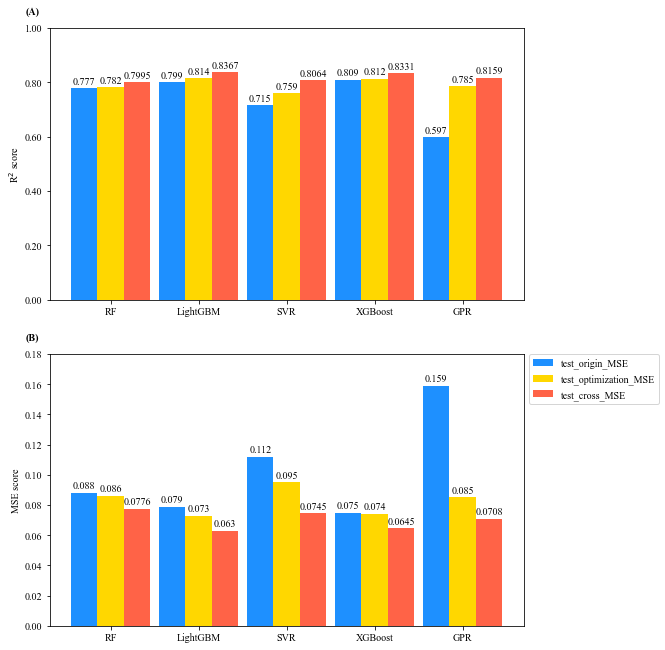

In [73]:
"""draw a column chart of R2 and MSE for each model 
during initial construction, optimization, and cross-validation
"""
fig, ax = plt.subplots(figsize=(8.5, 11))
# parameter assignment
font = {'family': 'Times New Roman',
        'size': 10}
size = 5
width = 0.3
labelsize = 10
fontsize = 10
x_coordinate = -0.05
y_coordinate = 1.05
x = np.arange(size)

r1 = x
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

ax1 = plt.subplot(2, 1, 1)
rects1 = ax1.bar(r1, test_origin_R2, width=width, label='test_origin_R$^2$ ', color='dodgerblue')
rects2 = ax1.bar(r2, test_optimization_R2, width=width, label='test_optimization_R$^2$ ', color='gold')
rects3 = ax1.bar(r3, test_cross_R2, width=width, label='test_Q$^2$ ', color='tomato')

ax1.set_ylabel('R$^2$ score', font)
plt.xticks([r + width for r in range(size)], model_name)
# set tick label font size
plt.tick_params(labelsize=labelsize)
# set the font of the x-axis and y-axis tick values
labels = ax1.get_xticklabels() + ax1.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
# set the range of y
ax1.set_ylim(0, 1)

for rects in [rects1, rects2]:
    ax1.bar_label(rects, padding=2, fontsize=fontsize, family='Times New Roman')
# set the position of the rects3 label
ax1.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, prop=font)
# force three digits
ax1.text(0.6, 0.815, '%.3f' % 0.800, ha='center', size=10, family='Times New Roman')
ax1.text(1.6, 0.852, '%.3f' % 0.837, ha='center', size=10, family='Times New Roman')
ax1.text(2.5999999999999996, 0.821, '%.3f' % 0.806, ha='center', size=10, family='Times New Roman')
ax1.text(3.5999999999999996, 0.848, '%.3f' % 0.833, ha='center', size=10, family='Times New Roman')
ax1.text(4.6, 0.831, '%.3f' % 0.816, ha='center', size=10, family='Times New Roman')
ax1.text(x_coordinate, y_coordinate, '(A)', transform=ax1.transAxes, size=10, family='Times New Roman', weight='bold')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax2 = plt.subplot(2, 1, 2)
rects4 = ax2.bar(r1, test_origin_MSE, width=width, label='test_origin_MSE', color='dodgerblue')
rects5 = ax2.bar(r2, test_optimization_MSE, width=width, label='test_optimization_MSE', color='gold')
rects6 = ax2.bar(r3, test_cross_MSE, width=width, label='test_cross_MSE', color='tomato')

# set the label and font size of the y-axis
ax2.set_ylabel('MSE score', font)
plt.xticks([r + width for r in range(size)], model_name)
# set tick label font size
plt.tick_params(labelsize=labelsize)
# set the font of the x-axis and y-axis tick values
labels = ax2.get_xticklabels() + ax2.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
ax2.set_ylim(0, 0.18)

for rects in [rects4, rects5, rects6]:
    ax2.bar_label(rects, padding=2, fontsize=fontsize, family='Times New Roman')
# add numbers to figures
ax2.text(x_coordinate, y_coordinate, '(B)', transform=ax2.transAxes, size=10, family='Times New Roman', weight='bold')
ax2.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, prop=font)
plt.savefig("fig4.tiff", bbox_inches='tight', dpi=300)
plt.show()

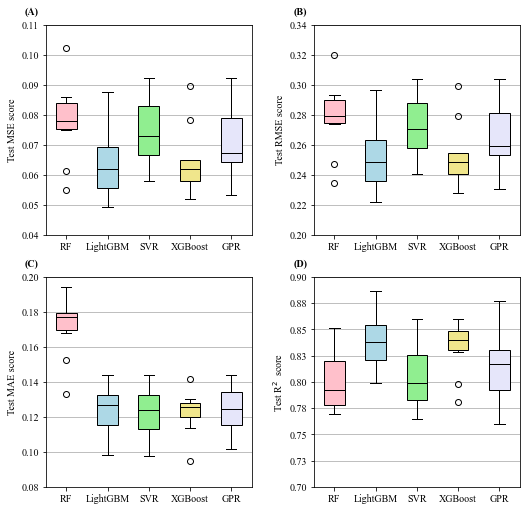

In [8]:
"""MSE, RMSE, MAE, R2 boxplots for ten-fold cross-validation for each model"""
plt.figure(figsize=(8.5, 8.5))
# parameter assignment
font = {'family': 'Times New Roman',
        'size': 10}
labelsize = 10
x_coordinate = -0.1
y_coordinate = 1.05
wspace = 0.3
hspace = 0.2

upper_list = [0.11, 0.34, 0.2, 0.9]
lower_list = [0.04, 0.2, 0.08, 0.7]
ylabel_list = ["Test MSE score", "Test RMSE score", "Test MAE score", "Test R$^2$  score"]
value_list = [test_mse, test_rmse, test_mae, test_r2]
color_list = ['pink', 'lightblue', 'lightgreen', 'khaki', 'lavender']
number_list = ['(A)', '(B)', '(C)', '(D)', '(E)']

for i, value, ylabel, number, lower, upper in zip(range(1, 5), value_list, ylabel_list, number_list, lower_list,
                                                  upper_list):
    ax = plt.subplot(2, 2, i)
    # draw the boxplot
    bplot = ax.boxplot(value, vert=True, patch_artist=True, labels=model_name)
    # set the label and font size of the y-axis
    ax.set_ylabel(ylabel, font)
    # significant digits to control the y scale value
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    # set tick label font size
    plt.tick_params(labelsize=labelsize)
    # set the font of the x-axis and y-axis tick values
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontname('Times New Roman') for label in labels]
    # add numbers to figures
    ax.text(x_coordinate, y_coordinate, number, transform=ax.transAxes, size=10, family='Times New Roman',
            weight='bold')
    # boxplots background color and medians midline color settings
    for patch, median_color, color in zip(bplot['boxes'], bplot['medians'], color_list):
        patch.set_facecolor(color)
        median_color.set(color='black', linewidth=1)
    ax.yaxis.grid(True)
    # set the range of y
    plt.ylim(lower, upper)

# set the spacing between graphs
plt.subplots_adjust(wspace=wspace, hspace=hspace)
plt.savefig("fig6.tiff", bbox_inches='tight', dpi=300)
plt.show()